In [1]:
import pandas as pd
from statannotations.Annotator import Annotator
import ptitprince as pt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sample_labels = ['Control', '12 min', '30 min', '60 min']

ins_dfs_ = [pd.read_csv("/home/carlos/oldies/manuscripts/review/tads/insulation_Control.tsv", sep="\t")]
ins_dfs_ += [pd.read_csv(f"/home/carlos/oldies/manuscripts/review/tads/insulation_{sample} min.tsv", sep="\t") for sample in [12, 30, 60]]

plot_DF = {
    'bs': [],
    'sample': [],
}

for i, df in enumerate(ins_dfs_):
    df_now = df[df['is_boundary_500000'] == True].copy()
    plot_DF['bs'] += df_now['boundary_strength_500000'].to_list()
    plot_DF['sample'] += [sample_labels[i]] * len(df_now)

plot_DF = pd.DataFrame(plot_DF)

/home/carlos/micromamba/envs/raincloud/lib/python3.11/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Control vs. 12 min: Mann-Whitney-Wilcoxon test two-sided, P_val:8.388e-25 U_stat=6.561e+06
12 min vs. 30 min: Mann-Whitney-Wilcoxon test two-sided, P_val:6.140e-02 U_stat=7.704e+06
30 min vs. 60 min: Mann-Whitney-Wilcoxon test two-sided, P_val:9.028e-02 U_stat=7.240e+06
Control vs. 30 min: Mann-Whitney-Wilcoxon test two-sided, P_val:2.055e-17 U_stat=6.711e+06
12 min vs. 60 min: Mann-Whitney-Wilcoxon test two-sided, P_val:8.499e-01 U_stat=7.454e+06
Control vs. 60 min: Mann-Whitney-Wilcoxon test two-sided, P_val:4.772e-24 U_stat=6.474e+06


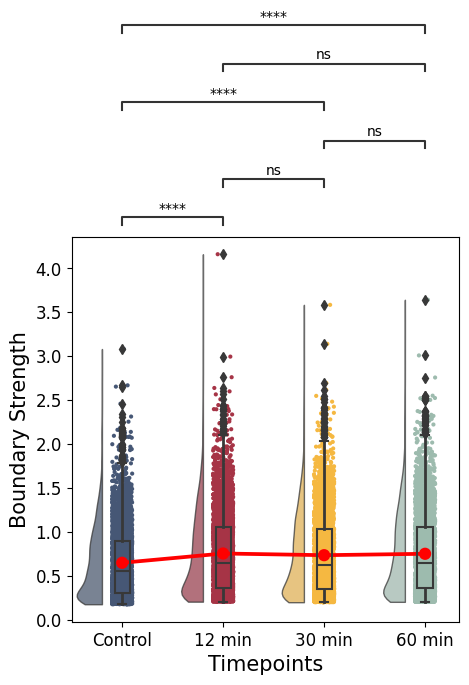

In [3]:
plot_DF['sample'] = pd.Categorical(plot_DF['sample'], categories=sample_labels, ordered=True)
s_colors = ['#465775', '#A63446', '#F5B841', '#9DBBAE']

fig, ax = plt.subplots(figsize=(5, 5))

x = 'sample'
y = 'bs'

pt.RainCloud(x = x, y = y, data = plot_DF, palette = s_colors, bw = .2, width_viol = .5, orient = "v", pointplot = "black" , alpha = .75, ax = ax)

pairs=[
    ('Control', '12 min'),
    ('Control', '30 min'),
    ('Control', '60 min'),
    ('12 min', '30 min'),
    ('12 min', '60 min'),
    ('30 min', '60 min'),
]

annotator = Annotator(ax, pairs, data=plot_DF, x=x, y=y)
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
annotator.apply_and_annotate()

ax.set_xlabel('Timepoints', fontsize=15)
ax.set_ylabel('Boundary Strength', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

fig.savefig('bs_insulation_all.png', dpi=300, bbox_inches='tight')
fig.savefig('bs_insulation_all.svg', bbox_inches='tight')